In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
Audit = pd.read_excel("./Audit.xlsx",header=0, usecols="A")
Audit.columns = Audit.columns.str.replace(' ','_')
Audit

,Audit_Time
0,12
1,15
2,20
3,22
4,14
5,14
6,15
7,27
8,21
9,18


In [4]:
Audit_array = Audit['Audit_Time']

In [5]:
Audit_array.min()

12

In [6]:
Audit_array.max()

33

In [8]:
Audit_group = np.where(Audit_array <=14, "14일 이하",
                       np.where((Audit_array >14)&(Audit_array<= 19), "15일~19일",
                        np.where((Audit_array>19)&(Audit_array<=24), "20일~24일",
                         np.where((Audit_array >24)&(Audit_array <=29), "25일~29일","30일 이상"))))

Audit_group

array(['14일 이하', '15일~19일', '20일~24일', '20일~24일', '14일 이하', '14일 이하',
       '15일~19일', '25일~29일', '20일~24일', '15일~19일', '15일~19일', '15일~19일',
       '20일~24일', '30일 이상', '15일~19일', '15일~19일', '15일~19일', '20일~24일',
       '25일~29일', '14일 이하'], dtype='<U7')

In [12]:
Audit_Series = pd.Series(Audit_group)
Audit_frequency = pd.DataFrame(Audit_Series.value_counts(),columns =["freq"])
Audit_frequency.sort_index(inplace=True)
Audit_frequency

,freq
14일 이하,4
15일~19일,8
20일~24일,5
25일~29일,2
30일 이상,1


In [13]:
Audit_frequency["ratio"] = np.round(Audit_frequency.freq/sum(Audit_frequency.freq),2) #상대도수 도출가능  
Audit_frequency["percentage"]= np.round(Audit_frequency.freq/sum(Audit_frequency.freq)*100,2).astype(str) + '%' 
Audit_frequency["cum_freq"] = np.cumsum(Audit_frequency.freq) #freq누적합계
Audit_frequency["cum_ratio"] = np.cumsum(Audit_frequency.ratio)
Audit_frequency["cum_%"] = np.round(Audit_frequency.cum_freq/sum(Audit_frequency.freq)*100,2).astype(str) + '%' #누적백분율도수

Audit_frequency

,freq,ratio,percentage,cum_freq,cum_ratio,cum_%
14일 이하,4,0.20,20.0%,4,0.20,20.0%
15일~19일,8,0.40,40.0%,12,0.60,60.0%
20일~24일,5,0.25,25.0%,17,0.85,85.0%
25일~29일,2,0.10,10.0%,19,0.95,95.0%
30일 이상,1,0.05,5.0%,20,1.00,100.0%


Text(0, 0.5, 'frequency')

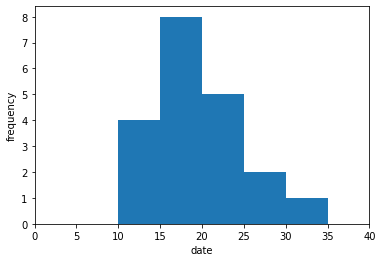

In [15]:
plt.subplot(111)
plt.hist(Audit['Audit_Time'],bins=[0,5,10,15,20,25,30,35])# bins는 계급을 구분해주는 것 
plt.xlim(0,40)
plt.xlabel('date')
plt.ylabel('frequency')